**Phase speeds of MHD waves in asymmetric slabs**

You've heard about various solar atmospheric structures and MHD waves... Let's see how we can combine all this observational an theoretical knowledge and carry out some modelling using Python!

First, we'll just grab everything we need...

In [ ]:
#Use for cloning
#!git clone https://github.com/zsanoki/stfc_summer_school_2024_python_part_1.git

#Or updating contents if the clone already exists
#%cd /content/stfc_summer_school_2024_python_part_1
#!git pull

Let's assume we are trying to find out what kind of waves a magnetic slab can guide when it's placed into an asymmetric magnetic environment.

/content/stfc_summer_school_2024_python_part_1/asymm_mag.png

The equation describing the dispersion of magneto-acoustic waves propagating along the slab in this case is:

/content/stfc_summer_school_2024_python_part_1/Dispersion_relation.PNG

Focusing on slow surface mode solutions, we can plot the density- and magnetic field-dependent phase speeds.

Importing modules:

In [1]:
# import necessary modules
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches
#from pylab import *
import matplotlib.gridspec as gridspec



Defining some physical parameters of the system:

In [2]:
# Define the sound speeds and Alfven speeds
# Fewer lines and/or importing possible. This is just an easy to follow example
c0=1. #internal sound speed
vA0=0.7 #internal Alfven speed
B0=0.7 #internal magnetic field
R1=0.5 #density ratio 1
R2=0.4 #density ratio 2
B1=0.14142135623  #magnetic field 1 to start
B2= 0.0632455532 #magnetic field 2 (held constant)
vA2= 0.1    #external Alfven speed 2 (held constant)

gamma=5.0/3.0

#calculate c2 to have pressure balance on the right. possibility: write a function
c2= (( c0**2 + 0.5 * gamma * vA0**2) * R2**(-1) - 0.5*gamma * vA2**2)**(0.5)
print('c2 value', c2) #to start from



c2 value 1.8741664813991312


Calculating any parameters that might need updating:

In [3]:
#functions to calculate sound and Alfven speeds in the LHS region
def vA1(B1,R1):
    return B1*(np.sqrt(R1))**(-1)

def c1(B1, R1):
    return np.sqrt(( c0**2 + 0.5 * gamma * vA0**2) * R1**(-1) - 0.5*gamma * vA1(B1, R1)**2)

# calculate tube speeds (internal and RHS - constant)
cT0=np.sqrt(c0**2*vA0**2*(c0**2+vA0**2)**(-1))
cT2=np.sqrt(c2**2*vA2**2*(c2**2+vA2**2)**(-1))

# calculate tube speed (LHS - NOT constant)
def cT1(B1, R1):
    return np.sqrt(np.sqrt(( c0**2 + 0.5 * gamma * vA0**2) * R1**(-1) - 0.5*gamma * vA1(B1, R1)**2)**2*vA1(B1, R1)**2*(np.sqrt(( c0**2 + 0.5 * gamma * vA0**2) * R1**(-1) - 0.5*gamma * vA1(B1, R1)**2)**2+vA1(B1, R1)**2)**(-1))

#caculate plasma-beta for each region
beta0=gamma*c0**2 * (2*vA0**2)**(-1)
beta1=gamma*c1(B1,R1)**2 * (2*vA1(B1, R1)**2)**(-1)
beta2=gamma*c2**2 * (2*vA2**2)**(-1)


Further physical parameters/ratios which might change in future uses:

In [4]:
#number of iterations in B1, R1 and K;
#limits of B1, R1 and K
NB1=20
NR1=35
NK=100
B1min=0.09104142135623
B1max=0.284142135623
R1min=0.3
R1max=0.75
Kmin=0.2
Kmax=9.8



#Wavenumber and frequency variables - size depending on the limits chosen
Kvals=np.arange(Kmin,Kmax,(Kmax-Kmin)*NK**(-1))
Wvals_saus=np.zeros((NB1,NR1,NK))
Wvals_kink=np.zeros((NB1,NR1,NK))


Reading magnetic field and density ranges, as well as solutions from the files:

In [5]:

# read B1, R1, K, Wvals_saus, Wvals_kink values that hhh_avcross_mf.py exported
f = np.loadtxt('/content/stfc_summer_school_2024_python_part_1/sample_data/FULLAC_B1.txt')
B1vals=f[0:NB1]
f.close()

f = np.loadtxt('/content/stfc_summer_school_2024_python_part_1/sample_data/FULLAC_R1.txt')
R1vals=f[0:NR1]
f.close()

In [6]:
#read solutions
f = np.loadtxt('/content/stfc_summer_school_2024_python_part_1/sample_data/FULLAC_K_WSAUS_WKINK_B1_%s_R1_%s.txt' %(0, 0))
Kvals=np.zeros(f.shape[0]-1)
Kvals=f[0:NK,0]
f.close()

for i in range(0, NB1):
    for j in range(0, NR1):
        try:
            f = np.loadtxt('/content/stfc_summer_school_2024_python_part_1/sample_data/FULLAC_K_WSAUS_WKINK_B1_%s_R1_%s.txt' %(i, j))
            Wvals_saus[i,j,:]=f[0:NK,1]
            Wvals_kink[i,j,:]=f[0:NK,2]
            f.close()
        except:
            pass
        j=j+1
    i=i+1



Picking some examples to plot:

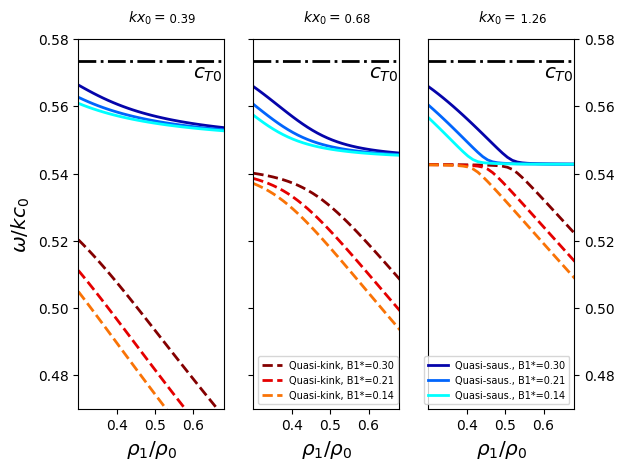

In [7]:
#B1 values chosen from B1vals
bs=[12,6,1]

#K value chosen from Kvals array (constant - same slab width)
Kc=10

#create a figure
fig1=plt.figure()

#custom ticks
thexticks = np.arange(0.4,0.8, 0.1)
gs0 = gridspec.GridSpec(1, 3) # 1 row, 3 columns

# "Homework": write functions to make this more efficient :)
# History in practice: do we need more than one plot? 2? 3? is someone on a deadline...
# Additional history: making this work after several years...... "no comment"

#axis for the first plot
ax00 = plt.subplot(gs0[0, 0])
# which bit of the data should be plotted, how
# advice: make the lines thicker than you think they should be
# further advice: use as many ways of differentiaing the curves as possible
ax00.plot(R1vals, Wvals_saus[bs[0],:,2], linestyle='-', color='#0504aa', linewidth=2)
ax00.plot(R1vals, Wvals_kink[bs[0],:,2], linestyle='--', color='#840000', linewidth=2)
ax00.plot(R1vals, Wvals_saus[bs[1],:,2],  linestyle='-', color='#0165fc', linewidth=2)
ax00.plot(R1vals, Wvals_kink[bs[1],:,2],linestyle='--', color='#e50000', linewidth=2)
ax00.plot(R1vals, Wvals_saus[bs[2],:,2],  linestyle='-', color='#00ffff', linewidth=2)
ax00.plot(R1vals, Wvals_kink[bs[2],:,2],linestyle='--', color='#f97306', linewidth=2)

#use our cusom ticks
ax00.set_xticks(thexticks)

#pick the limits of plotting
ax00.set_xlim(R1vals[0],0.68)
ax00.set_ylim(0.47,0.58)

# additional information: what's the tube speed
ax00.axhline(y=cT0, color='k', linestyle='-.',linewidth=2)

# adding text: what, where, how
ax00.annotate(r'$c_{T0}$', xy=(0.6,cT0-0.005), annotation_clip=False, fontsize='x-large')

# never forget to label your axes
ax00.set_xlabel(r'$\rho_1/\rho_0$',fontsize='x-large')
ax00.set_ylabel(r'$\omega/kc_0$',fontsize='x-large')
ax00.annotate(r'$kx_0=$', xy=(0.43,0.585), fontsize='medium', annotation_clip=False)
ax00.annotate("{:10.2f}".format(Kvals[2]), xy=(0.48,0.585), fontsize='small', annotation_clip=False)

#same for the other two axes
ax01 = plt.subplot(gs0[0, 1])
ax01.plot(R1vals, Wvals_saus[bs[0],:,5], linestyle='-', color='#0504aa', linewidth=2)
ax01.plot(R1vals, Wvals_kink[bs[0],:,5], linestyle='--', color='#840000', linewidth=2, label='Quasi-kink, B1*=0.30') #labels - importandd if you want a pre-made legend
ax01.plot(R1vals, Wvals_saus[bs[1],:,5],  linestyle='-', color='#0165fc', linewidth=2)
ax01.plot(R1vals, Wvals_kink[bs[1],:,5],linestyle='--', color='#e50000', linewidth=2, label='Quasi-kink, B1*=0.21')
ax01.plot(R1vals, Wvals_saus[bs[2],:,5],  linestyle='-', color='#00ffff', linewidth=2)
ax01.plot(R1vals, Wvals_kink[bs[2],:,5],linestyle='--', color='#f97306', linewidth=2, label='Quasi-kink, B1*=0.14')
ax01.legend(loc=3,prop={'size':7})
ax01.set_xticks(thexticks)
#ax01.set_yticks(fakeyticks)
ax01.set_xlim(R1vals[0],0.68)
ax01.set_ylim(0.47,0.58)
plt.setp(ax01.get_yticklabels(), visible=False)
ax01.axhline(y=cT0, color='k', linestyle='-.',linewidth=2)
ax01.annotate(r'$c_{T0}$', xy=(0.6,cT0-0.005), annotation_clip=False, fontsize='x-large')
ax01.set_xlabel(r'$\rho_1/\rho_0$',fontsize='x-large')
#ax01.set_ylabel(r'$\omega/k$',fontsize='x-large')
ax01.annotate(r'$kx_0=$', xy=(0.43,0.585), fontsize='medium', annotation_clip=False)
ax01.annotate("{:10.2f}".format(Kvals[5]), xy=(0.48,0.585), fontsize='small', annotation_clip=False)

ax02 = plt.subplot(gs0[0, 2])
ax02.plot(R1vals, Wvals_saus[bs[0],:,11], linestyle='-', color='#0504aa', linewidth=2, label='Quasi-saus., B1*=0.30')
ax02.plot(R1vals, Wvals_kink[bs[0],:,11], linestyle='--', color='#840000', linewidth=2)
ax02.plot(R1vals, Wvals_saus[bs[1],:,11],  linestyle='-', color='#0165fc', linewidth=2, label='Quasi-saus., B1*=0.21')
ax02.plot(R1vals, Wvals_kink[bs[1],:,11],linestyle='--', color='#e50000', linewidth=2)
ax02.plot(R1vals, Wvals_saus[bs[2],:,11],  linestyle='-', color='#00ffff', linewidth=2, label='Quasi-saus., B1*=0.14')
ax02.plot(R1vals, Wvals_kink[bs[2],:,11],linestyle='--', color='#f97306', linewidth=2)
ax02.legend(loc=4,prop={'size':7})
ax02.set_xticks(thexticks)
ax02.set_xlim(R1vals[0],0.68)
ax02.set_ylim(0.47,0.58)
ax02.yaxis.tick_right()
ax02.axhline(y=cT0, color='k', linestyle='-.',linewidth=2)
ax02.annotate(r'$c_{T0}$', xy=(0.6,cT0-0.005), annotation_clip=False, fontsize='x-large')
ax02.set_xlabel(r'$\rho_1/\rho_0$',fontsize='x-large')
#ax02.set_ylabel(r'$\omega/k$',fontsize='x-large')
ax02.annotate(r'$kx_0=$', xy=(0.43,0.585), fontsize='medium', annotation_clip=False)
ax02.annotate("{:10.2f}".format(Kvals[11]), xy=(0.48,0.585), fontsize='small', annotation_clip=False)

#save and show figures if needed

plt.savefig("Nice_new_figure_for_summer_school.png")

plt.show()




"Busy" plots: make sure you do your best to differentiate between any curves, shapes, etc. you include on your plots. Do not rely exclusivey on colours (think of people with limited colur vision and of B&W printing...).
Useful online tools abound, e.g. https://davidmathlogic.com/colorblind/#%23D81B60-%231E88E5-%23FFC107-%23004D40